# 1) Obtaining data and loading libraries

In [284]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

df=pd.read_csv('kc_house_data.csv')

#Inital look at df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [285]:
#Initial observations
    #df has 21597 rows and 21 colums with various data types
    #columns waterfront, view and yr_renovated have missing values

# 2) Data cleaning + Data Exploration

## Dealing with missing values

In [286]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [287]:
#columns waterfront, view and yr_renovated have missing values

#YR_RENOVATED
print(df.yr_renovated.value_counts().head())

# 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
# there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value
#I will later make this columns categorical and bin the values

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64


In [288]:
df.yr_renovated = df.yr_renovated.astype('str')
df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

In [289]:
print(df.yr_renovated.isna().sum())

0


In [290]:
#VIEW
# this columns has 63 NaNs
# the overwhelming value in this column is 0 (19 422 out of 21 597)
# I will turn the missing values into '0'
# I will later make this columns categorical 

df.view.value_counts()
df.view = df.view.fillna(0.0)

In [291]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Looking for placeholders

In [292]:
#checking for placeholders in individual columns
#I will later use scatter plots to check for other unusual values and outliers

for var in list(df.columns):
    print (df[var].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64
47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
47.6886    16
47.6955    16
47.6647    15
47.6904    15
47.6860    15
47.6842    15
47.5402    15

In [293]:
#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)

#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

#I will make this column categorical and turn '0' into a category of "no basement"

In [294]:
df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

## Checking columns types

In [295]:
#CHECKING COLUMN TYPES 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


In [296]:
# I will turn column zipcode into strings(objects) as they are categorical variables
df.zipcode = df.zipcode.astype('str')

#I will turn View into integer
df.view = df.view.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


## Initial Data Exploration and Removing outliers

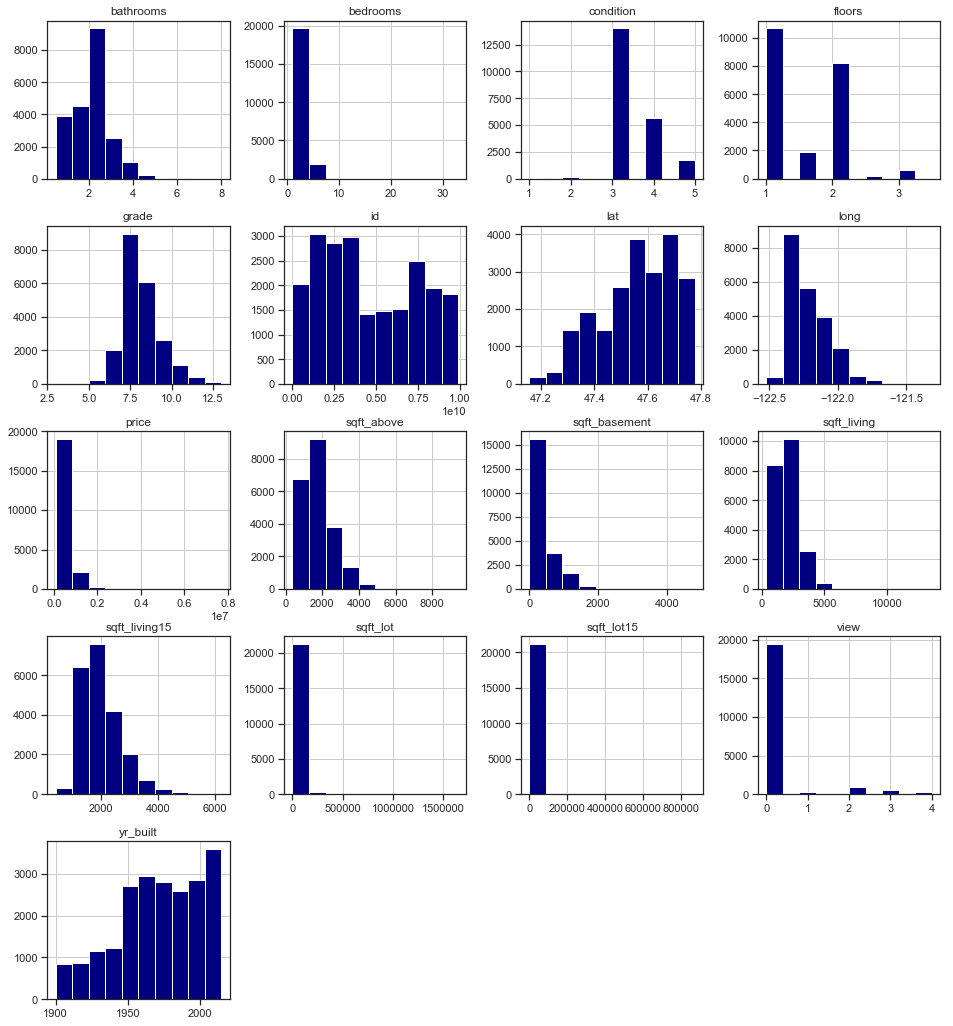

In [297]:
#QUICK VISUALISATIONS
df.hist(figsize=(16,18),color='navy');
# columns such as bedrooms, price, sqft_lot, sqft_above, sqft_basement and sqft_lot15 seem to have some outliers
# columns condition, floors, grade, bathrooms, view and bathrooms look like categorical variables


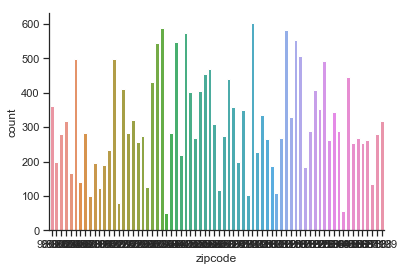

In [298]:
sns.countplot(df['zipcode'])
sns.despine();
#properties in zipocdes are not evenly distributed, but that was expected
#no zipcode category contains more than 600 houses

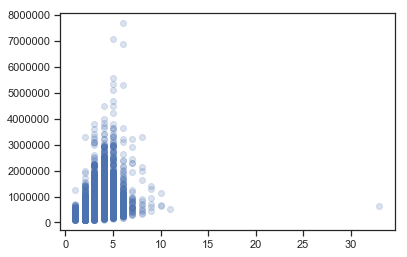

In [299]:
# after a quick look at different scatterplots, I have identified some outliers
plt.scatter(df.bedrooms,df.price, alpha = 0.2)
plt.show()

In [300]:
#looking for outliers
df.describe()
#there is a house with 33 bedrooms
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


In [301]:
#I will remove this house from the dataset
df = df.drop([15856])

In [302]:
#also, there are 7 houses sold for more than $5 000 000
#let's have a look at them
df.loc[df.price > 5000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,5110000.0,5,5.25,8010,45517,2.0,4,3,12,5990,2020.0,1999,not renovated,98033,47.6767,-122.211,3430,26788
1313,7558700030,5300000.0,6,6.00,7390,24829,2.0,0,4,12,5000,2390.0,1991,not renovated,98040,47.5631,-122.210,4320,24619
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,4,3,12,6720,1280.0,2009,not renovated,98004,47.6232,-122.220,4600,21750
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,2,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,3,13,6200,3000.0,2001,not renovated,98039,47.6289,-122.233,3560,24345
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,3,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,4,3,13,8860,1030.0,2001,not renovated,98039,47.6305,-122.240,4540,42730


In [303]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])

In [304]:
#dropping houses above $5 mil
df = df.drop([1162])
df = df.drop([1313])
df = df.drop([1446])
df = df.drop([4407])

In [305]:
#Outliers in sqft_living
df.loc[df.sqft_living > 8000]
#There are only 4 properties with sgft_living value above 8000 sqft
#The value of the largest property is $2,280,000
#I will remove this property from the dataset


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,1924059029,4670000.0,5,6.75,9640,13068,1.0,4,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
12764,1225069038,2280000.0,7,8.00,13540,307752,3.0,4,3,12,9410,4130.0,1999,not renovated,98053,47.6675,-121.986,4850,217800
14542,2303900035,2890000.0,5,6.25,8670,64033,2.0,4,3,13,6120,2550.0,1965,not renovated,98177,47.7295,-122.372,4140,81021
18288,6072800246,3300000.0,5,6.25,8020,21738,2.0,0,3,11,8020,0.0,2001,not renovated,98006,47.5675,-122.189,4160,18969


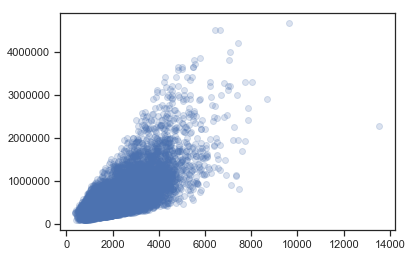

In [306]:
plt.scatter(df.sqft_living,df.price, alpha = 0.2)
plt.show()

In [307]:
df = df.drop([12764])
df = df.drop([8085])
df = df.drop([18288])
df = df.drop([14542])

In [308]:
#Basement
df.loc[df.sqft_basement > 3000]
# there are only 2 properties with basement larget than 3000 sqft
# I will remove them from the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10074,7767000060,1900000.0,5,4.25,6510,16471,2.0,3,4,11,3250,3260.0,1980,not renovated,98040,47.5758,-122.242,4480,16471
15468,624069108,3200000.0,4,3.25,7000,28206,1.0,4,4,12,3500,3500.0,1991,not renovated,98075,47.5928,-122.086,4913,14663


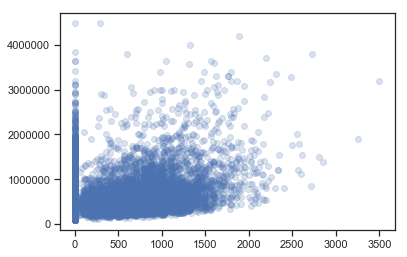

In [309]:
plt.scatter(df.sqft_basement,df.price, alpha = 0.2)
plt.show()

In [310]:
df = df.drop([10074])
df = df.drop([15468])

In [311]:
#sqft_lot
#there are only 4 properties with lots larget than 1 000 000 sqft
df.loc[df.sqft_lot > 1000000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,700000.0,4,1.00,1300,1651359,1.0,3,4,6,1300,0.0,1920,not renovated,98022,47.2313,-122.023,2560,425581
7640,2623069031,542500.0,5,3.25,3010,1074218,1.5,0,5,8,2010,1000.0,1931,not renovated,98027,47.4564,-122.004,2450,68825
7762,2323089009,855000.0,4,3.50,4030,1024068,2.0,0,3,10,4030,0.0,2006,not renovated,98045,47.4619,-121.744,1830,11700
17305,3326079016,190000.0,2,1.00,710,1164794,1.0,0,2,5,710,0.0,1915,not renovated,98014,47.6888,-121.909,1680,16730


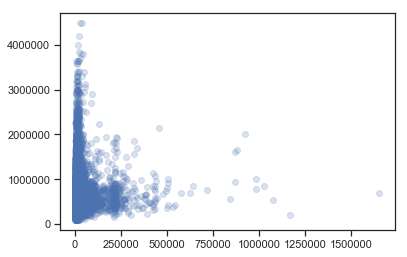

In [312]:
plt.scatter(df.sqft_lot,df.price, alpha = 0.2)
plt.show()

In [313]:
df = df.drop([1717])
df = df.drop([7640])
df = df.drop([7762])
df = df.drop([17305])

In [314]:
# there are only 3 properties with lot15 larger than 500 000 sqft
df.loc[df.sqft_lot15 > 500000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,937500.0,4,4.0,5545,871200,2.0,0,3,11,3605,1940.0,2003,not renovated,98014,47.6760,-121.882,3420,871200
13451,3420069060,790000.0,3,2.5,2640,432036,1.5,3,3,10,2640,0.0,1996,not renovated,98022,47.1795,-122.036,1500,560617
20436,1125079111,1600000.0,4,5.5,6530,871200,2.0,2,3,11,6530,0.0,2008,not renovated,98014,47.6640,-121.878,1280,858132


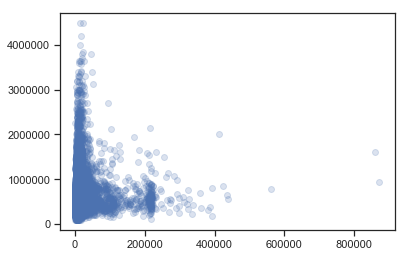

In [315]:
plt.scatter(df.sqft_lot15,df.price, alpha = 0.2)
plt.show()

In [316]:
df = df.drop([9705])
df = df.drop([13451])
df = df.drop([20436])

## Multicollinearity

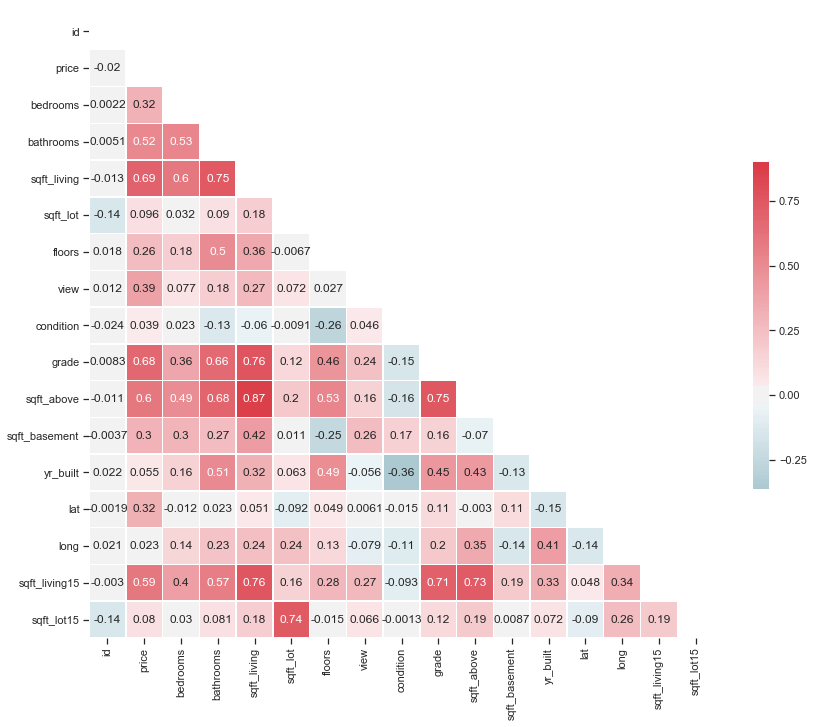

In [317]:
# checking for MULTICOLLINEARITY


sns.set(style="ticks")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

In [318]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# looking at the 5 point statistics, their values seems to be roughly similar, they indeed look they describe the same
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.157600e+04,2.157600e+04,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000
mean,4.581116e+09,5.376951e+05,3.370551,2.113274,2075.702911,14753.897340,1.493813,0.231368,3.409854,7.654941,1785.424592,284.264043,1970.994809,47.560076,-122.214073,1985.301075,12615.373795
std,2.876457e+09,3.501127e+05,0.902949,0.762225,900.106965,36767.032445,0.539620,0.760893,0.650471,1.167740,817.852595,435.035649,29.370902,0.138550,0.140665,683.232348,25556.111824
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1426.500000,5040.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7614.500000,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.441250e+05,4.000000,2.500000,2550.000000,10656.750000,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,47.678025,-122.125000,2360.000000,10080.000000
max,9.900000e+09,4.500000e+06,11.000000,7.500000,7880.000000,982998.000000,3.500000,4.000000,5.000000,13.000000,7880.000000,2850.000000,2015.000000,47.777600,-121.315000,6210.000000,438213.000000


In [319]:
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

# I will also drop the ID column
df = df.drop('id',axis=1)

## Transforming numerical variables

In [320]:
#LOG TRANSFORMATION
#let's have a look at distribution of our numeric data to see which columns need log transormation

#for column in ['sqft_living', 'sqft_lot','sqft_basement','sqft_living15','sqft_lot15']:
 #   df[column].plot.hist(normed=True)
  #  df[column].plot.kde(label=column)
   # plt.legend()
    #plt.show()
    
# all columns might need log transformation to improve distribution and skewness:
  
    
    
#log transoforming cat data   
#df.bedrooms = np.log(df.bedrooms)
#df.bathrooms = np.log(df.bathrooms)
#df.floors = np.log(df.floors)
#df.view = np.log(df.view)
#df.condition = np.log(df.condition)
#df.grade = np.log(df.grade)


In [321]:
#Log transforming data
df.sqft_living = np.log(df.sqft_living)
df.sqft_lot = np.log(df.sqft_lot)

df.sqft_living15 = np.log(df.sqft_living15)
df.sqft_lot15 = np.log(df.sqft_lot15)

#sqft_basement has zero values - what should I do with it?

In [322]:
#Standardisation/Normalisation
#all numerical columns: sqft_living,sqft_lot, sqft_living15, sqft_lot15
df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()

df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()

In [323]:
#experiment: transforming target variable
df.price = np.log(df.price)


In [324]:
df.price = (df.price - df.price.mean()) / df.price.std()

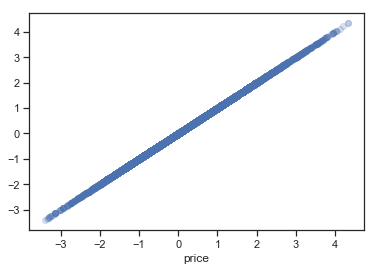

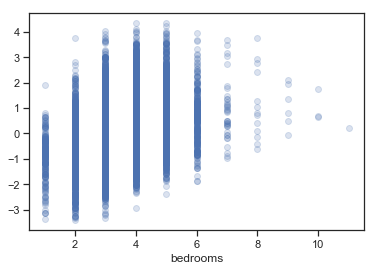

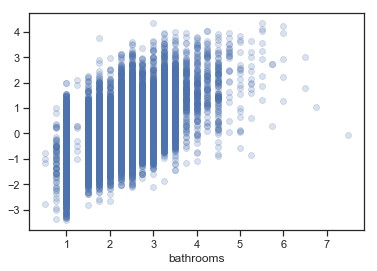

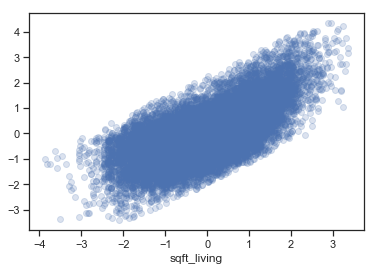

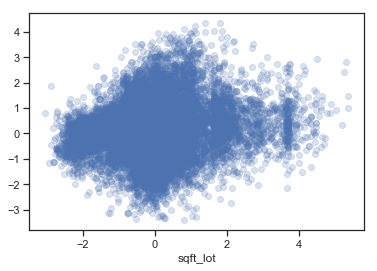

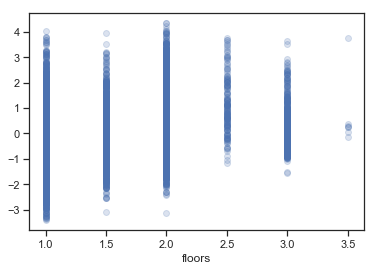

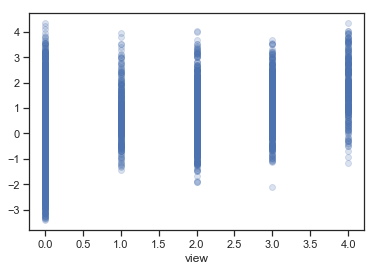

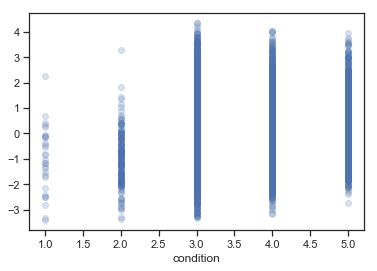

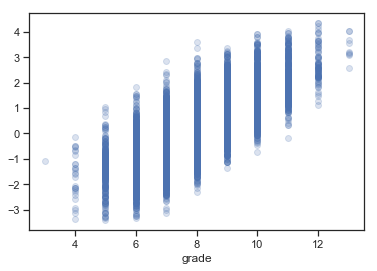

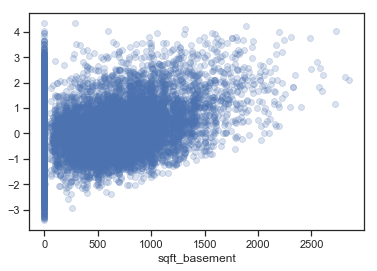

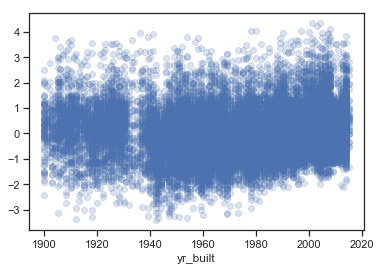

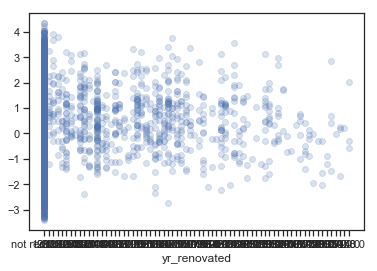

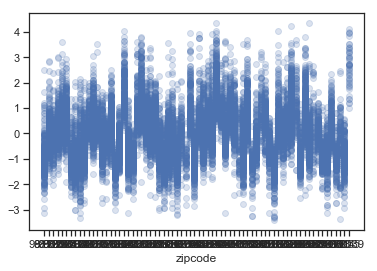

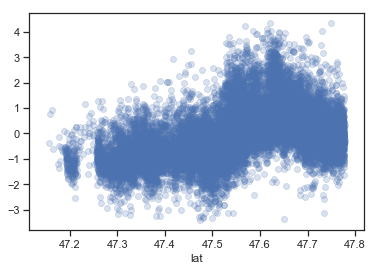

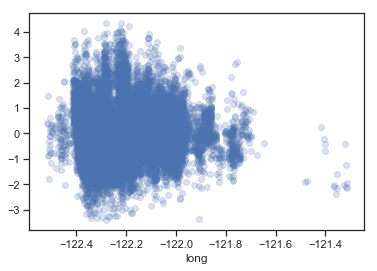

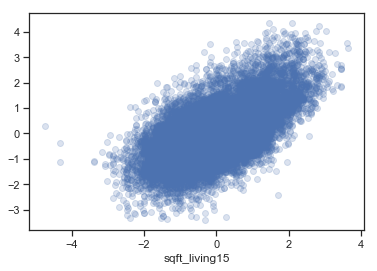

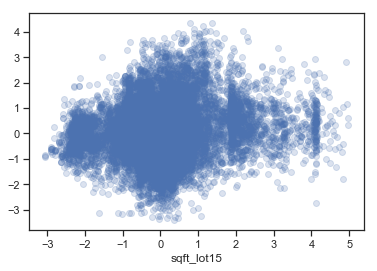

In [325]:
#TESTING ASSUMPTIONS FOR LINEAR REGRESSION

list_of_columns = list(df.columns)

for column in list_of_columns:
    plt.scatter(df[column],df.price, alpha =0.2)
    plt.xlabel(column)
    plt.show()

In [326]:
#observations
    #sqft_living does not seem very linear (exponential, perhaps?), also has some outliers
    #sqft_basement will be a categotical variable, as there are too many 0 values for properties without basement
    #the same applies for yr_renovated
    #lat has many outliers in terms of high price (350 000+), but has a slighly linear relationship
        #northern properties have generaly bigger value than southern
        # peak between 47.55 and 47.65
    #long does not have a linear relationship, value of properties peak at -122.2 and then decrease

## Preparing categorical variables

In [40]:
#DEALING WITH CATEGORICAL VARIABLES
# bedrooms
# bathrooms
# floors
# view
# condition
# grade


for var in ['bedrooms','bathrooms','floors','view','condition','grade']:
    print (df[var].value_counts())

3     9823
4     6878
2     2759
5     1593
6      269
1      196
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
2.50    5376
1.00    3849
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     730
3.25     588
3.75     155
4.00     135
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.50       2
7.50       1
6.75       1
Name: bathrooms, dtype: int64
1.0    10669
2.0     8224
1.5     1908
3.0      610
2.5      160
3.5        7
Name: floors, dtype: int64
0    19477
2      955
3      505
1      330
4      311
Name: view, dtype: int64
3    14007
4     5674
5     1699
2      169
1       29
Name: condition, dtype: int64
7     8973
8     6064
9     2615
6     2037
10    1132
11     395
5      241
12      84
4       27
13       9
3        1
Name: grade, dtype: int64


In [327]:
#columns condition, view, floors are distributed within less than 7 numbers - I will simply turn them into categories now
#I will also add zipcode
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.floors = df.floors.astype('category')
#df.zipcode = df.zipcode.astype('category')

#creating dummy columns
condition_dummies = pd.get_dummies(df.condition,prefix='cond')
view_dummies = pd.get_dummies(df.view,prefix='view')
floors_dummies = pd.get_dummies(df.floors,prefix='flo')
#zipcode_dummies = pd.get_dummies(df.zipcode, prefix='zip')

#removing original columns
df = df.drop(["condition","view","floors","zipcode"], axis=1)

#adding dummy columns
df = pd.concat([df, condition_dummies, view_dummies, floors_dummies], axis=1)
df.info()
#ADD

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Data columns (total 29 columns):
price            21576 non-null float64
bedrooms         21576 non-null int64
bathrooms        21576 non-null float64
sqft_living      21576 non-null float64
sqft_lot         21576 non-null float64
grade            21576 non-null int64
sqft_basement    21576 non-null float64
yr_built         21576 non-null int64
yr_renovated     21576 non-null object
lat              21576 non-null float64
long             21576 non-null float64
sqft_living15    21576 non-null float64
sqft_lot15       21576 non-null float64
cond_1           21576 non-null uint8
cond_2           21576 non-null uint8
cond_3           21576 non-null uint8
cond_4           21576 non-null uint8
cond_5           21576 non-null uint8
view_0           21576 non-null uint8
view_1           21576 non-null uint8
view_2           21576 non-null uint8
view_3           21576 non-null uint8
view_4           21576 non-null uint

In [328]:
#turning yr_renoved into numerical
#I am replacing the 'not renovated' values into the corresponding 'yr_built value'.
#This columns now represent the age of the house taking into consideration renovations
#The Person's correlation coefficient is now 0.93! I will drop the 'yr_built' category now.
df.yr_renovated.value_counts()
df.loc[df.yr_renovated == 'not renovated','yr_renovated'] = df['yr_built']
df.yr_renovated = df.yr_renovated.astype('float64')



C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


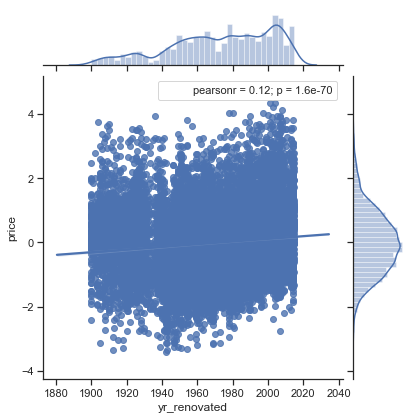

In [329]:
from scipy.stats import pearsonr
sns.jointplot(x='yr_renovated', y='price', data=df, kind = 'reg', stat_func=pearsonr)

In [330]:
df.bedrooms = df.bedrooms.astype('float64')
df.grade = df.grade.astype('float64')

bedrooms_bins = [0,2,3,4,5,11]
bathrooms_bins = [0,1,2,3,4,5,8]
grade_bins = [0,6,7,8,9,10,11,14]

yr_renovated_bins = [1900,1920,1940,1960,1980,2000,2010,2020]
sqft_basement_bins = [0,500,1000,6000]

In [331]:
# using pd.cut
bins_bedrooms = pd.cut(df['bedrooms'], bedrooms_bins)
bins_bathrooms = pd.cut(df['bathrooms'], bathrooms_bins)
bins_grade = pd.cut(df['grade'], grade_bins)


bins_yr_renovated = pd.cut(df['yr_renovated'], yr_renovated_bins)
bins_sqft_basement = pd.cut(df['sqft_basement'], sqft_basement_bins)

In [332]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_grade = bins_grade.cat.as_unordered()

bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

bins_sqft_basement = bins_sqft_basement.cat.as_unordered()

In [333]:
# replace the existing columns
df['bedrooms']=bins_bedrooms
df['bathrooms']=bins_bathrooms
df['grade']=bins_grade


df['yr_renovated']=bins_yr_renovated

df['sqft_basement'] = bins_sqft_basement

In [334]:
#LABEL ENCODING

df['bedrooms'] = df['bedrooms'].cat.codes
df['bathrooms'] = df['bathrooms'].cat.codes
df['grade'] = df['grade'].cat.codes

df['yr_renovated'] = df['yr_renovated'].cat.codes

df['sqft_basement'] = df['sqft_basement'].cat.codes

In [335]:
#CREATING DUMMY VARIABLES

bathrooms_dummy = pd.get_dummies(df['bathrooms'], prefix="bath")
bedrooms_dummy = pd.get_dummies(df['bedrooms'], prefix="bed")
grade_dummy = pd.get_dummies(df['grade'], prefix="grade")


yr_renovated_dummy = pd.get_dummies(df['yr_renovated'], prefix="reno")

sqft_basement_dummy = pd.get_dummies(df['sqft_basement'], prefix= "base")

In [336]:
add_series = [df,bathrooms_dummy, bedrooms_dummy, grade_dummy, sqft_basement_dummy,yr_renovated_dummy]
df = pd.concat(add_series, axis=1)


In [337]:
#removing original columns
df = df.drop(["bedrooms","bathrooms","grade", "yr_renovated","sqft_basement"], axis=1)


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Data columns (total 54 columns):
price            21576 non-null float64
sqft_living      21576 non-null float64
sqft_lot         21576 non-null float64
yr_built         21576 non-null int64
lat              21576 non-null float64
long             21576 non-null float64
sqft_living15    21576 non-null float64
sqft_lot15       21576 non-null float64
cond_1           21576 non-null uint8
cond_2           21576 non-null uint8
cond_3           21576 non-null uint8
cond_4           21576 non-null uint8
cond_5           21576 non-null uint8
view_0           21576 non-null uint8
view_1           21576 non-null uint8
view_2           21576 non-null uint8
view_3           21576 non-null uint8
view_4           21576 non-null uint8
flo_1.0          21576 non-null uint8
flo_1.5          21576 non-null uint8
flo_2.0          21576 non-null uint8
flo_2.5          21576 non-null uint8
flo_3.0          21576 non-null uint8
flo

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Columns: 131 entries, price to base_2
dtypes: float64(7), uint8(124)
memory usage: 4.5 MB


# 3) Modeling data

In [339]:
#RENAMING FLOORS COLUMNS

df = df.rename(columns={'flo_1.0': 'flo10','flo_1.5': 'flo15','flo_2.0': 'flo20','flo_2.5': 'flo25','flo_3.0': 'flo30','flo_3.5': 'flo35'})

In [340]:
df = df.rename(columns={'base_-1':'baseminus1','base_0':'base0','base_1':'base1','base_2':'base2'})


In [341]:
df = df.rename(columns={'reno_-1':'renominus1','reno_0':'reno0','reno_1':'reno1','reno_2':'reno2','reno_3':'reno3','reno_4':'reno4','reno_5':'reno5','reno_6':'reno6'})

In [342]:
df = df.rename(columns={'bed_-1':'bedminus1'})

In [343]:
len(df.columns)

54

In [278]:
# intial run (outliers removed) 0.824, 0.823
# with outliers: 0.816, 0.815
# after removing id column: 0.826
# after removing houses above £5 mil 0.826,0.825
# after transforming target variable: 0.885, 0.885
# without creating cat variables 0.879
# without zipcodes 0.775

In [344]:
df = df.drop('long', axis =1)

In [345]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [346]:
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1689.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:20:39   Log-Likelihood:                -14503.
No. Observations:               21576   AIC:                         2.910e+04
Df Residuals:                   21531   BIC:                         2.946e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -42.8328      0.566    -75.642      0.000     -43.943     -41.723
sqft_living       0.2877      0.008     34.469      0.000       0.271       0.304
sqft_lot          0.0521      0.009      6.068      0.000       0.035       0.069
yr_built         -0.0076      0.000    -26.587      0.000      -0.008      -0.007
lat               2.5414      0.025    100.166      0.000       2.492       2.591
sqft_living15     0.1335      0.006     24.191      0.000       0.123       0.144
sqft_lot15       -0.0506      0.008     -6.026      0.000      -0.067      -0.034
cond_1           -8.9947      0.135    -66.685      0.000      -9.259      -8.730
cond_2           -8.7183      0.118    -73.925      0.000      -8.949      -8.487
cond_3           -8.5171      0.115    -73.890      0.000      -8.743      -8.291
cond_4           -8.3580      0.114    -73.018      0.000      -8.582      -8.134
cond_5           -8.2446      0.115    -71.872      0.000      -8.469      -8.020
view_0           -8.9119      0.115    -77.554      0.000      -9.137      -8.687
view_1           -8.5913      0.116    -74.307      0.000      -8.818      -8.365
view_2           -8.6770      0.114    -75.965      0.000      -8.901      -8.453
view_3           -8.5515      0.114    -74.935      0.000      -8.775      -8.328
view_4           -8.1011      0.115    -70.486      0.000      -8.326      -7.876
flo10            -7.2266      0.098    -73.584      0.000      -7.419      -7.034
flo15            -7.2123      0.098    -73.438      0.000      -7.405      -7.020
flo20            -7.2140      0.099    -73.216      0.000      -7.407      -7.021
flo25            -7.0979      0.102    -69.566      0.000      -7.298      -6.898
flo30            -7.1130      0.103    -69.254      0.000      -7.314      -6.912
flo35            -6.9690      0.180    -38.809      0.000      -7.321      -6.617
bath_0           -7.3798      0.096    -77.109      0.000      -7.567      -7.192
bath_1           -7.3131      0.095    -76.578      0.000      -7.500      -7.126
bath_2           -7.2667      0.096    -75.854      0.000      -7.454      -7.079
bath_3           -7.1049      0.097    -73.574      0.000      -7.294      -6.916
bath_4           -6.9467      0.100    -69.578      0.000      -7.142      -6.751
bath_5           -6.8216      0.120    -57.025      0.000      -7.056      -6.587
bed_0            -8.4711      0.114    -73.983      0.000      -8.696      -8.247
bed_1            -8.5493      0.114    -75.276      0.000      -8.772      -8.327
bed_2            -8.5794      0.113    -75.710      0.000      -8.801      -8.357
bed_3            -8.5892      0.114    -75.499      0.000      -8.812      -8.366
bed_4            -8.6438      0.115    -75.110      0.000      -8.869      -8.418
grade_0          -7.0883      0.080    -88.645   

In [282]:
#removing these features from the dataset based on their high p-value did not produce any difference in R-squared
#high_p_values = ['id', 'lat', 'sqft_lot15', 'zip_98102', 'zip_98119']
#df_reduced = df.drop(high_p_values, axis=1)
#Skew: -0.2 symmetrical
#Kurtosis: 5.7 - high, leptokurtic, sign of outliers?

## Regression Assumption Testing

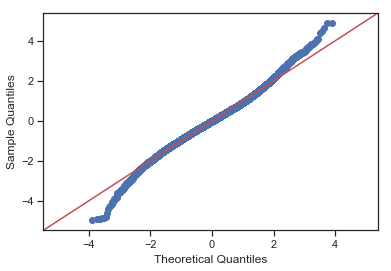

In [348]:
# Normality assumption
# the normality assumption talks about the model residuals and not about the distributions of the variables

residuals = model.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)



In [78]:
# Normal Q-Q plots that exhibit this behavior usually mean your data have more extreme values than would be expected


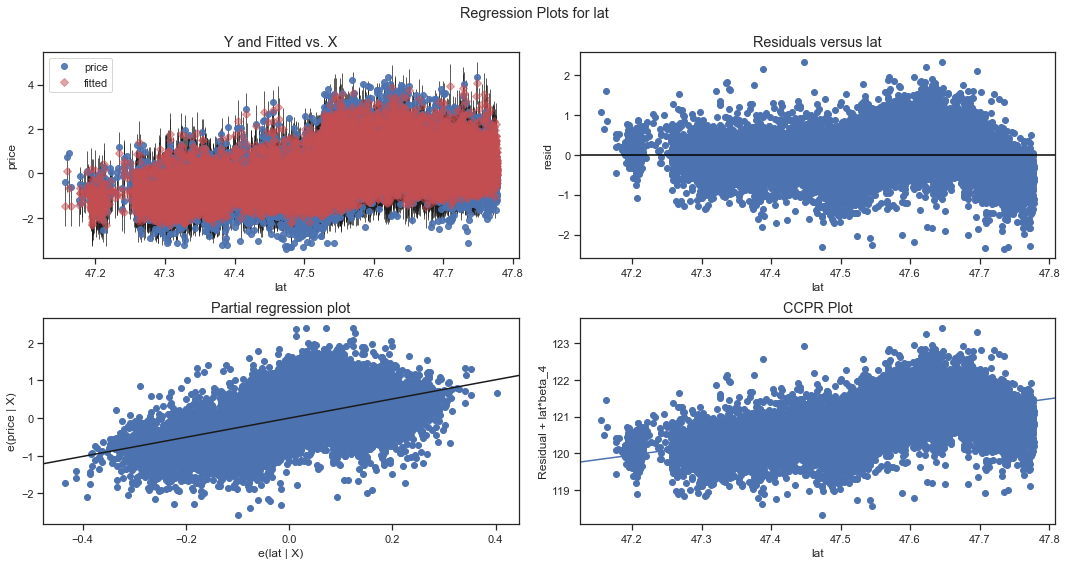

In [349]:


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'lat', fig=fig)
plt.show()

#heteroscedastic: lat,long

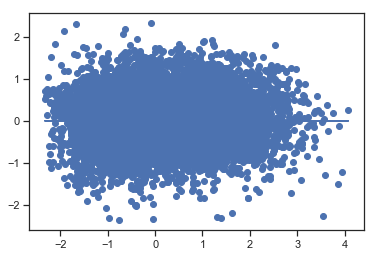

In [350]:
x_cols = df.columns
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])
#overall, the model seems homoscedastic
#some large errors below -2 price

In [351]:
#finding a cut offpoint
for i in range(0,10):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.0 percentile: -3.4033439750553853
0.01 percentile: -2.104372721396447
0.02 percentile: -1.860266298411684
0.03 percentile: -1.6832314656367928
0.04 percentile: -1.5815574830981831
0.05 percentile: -1.5121110198931622
0.06 percentile: -1.4237119622566234
0.07 percentile: -1.367676288903352
0.08 percentile: -1.3054698998719838
0.09 percentile: -1.2571238422513233


In [352]:
#0.02 percentile

In [353]:
subset = df[df['price']>-1.859]
print('Percent removed:',(len(df) - len(subset))/len(df))
outcome = 'price'
x_cols = predictors
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.020207638116425657


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1629.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:22:25   Log-Likelihood:                -13402.
No. Observations:               21140   AIC:                         2.689e+04
Df Residuals:                   21095   BIC:                         2.725e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -40.8208      0.552    -73.962      0.000     -41.903     -39.739
sqft_living       0.2646      0.008     32.426      0.000       0.249       0.281
sqft_lot          0.0490      0.008      5.884      0.000       0.033       0.065
yr_built         -0.0077      0.000    -27.832      0.000      -0.008      -0.007
lat               2.4445      0.025     98.718      0.000       2.396       2.493
sqft_living15     0.1312      0.005     24.391      0.000       0.121       0.142
sqft_lot15       -0.0451      0.008     -5.529      0.000      -0.061      -0.029
cond_1           -8.3913      0.137    -61.246      0.000      -8.660      -8.123
cond_2           -8.2426      0.116    -71.057      0.000      -8.470      -8.015
cond_3           -8.1931      0.113    -72.740      0.000      -8.414      -7.972
cond_4           -8.0504      0.112    -71.987      0.000      -8.270      -7.831
cond_5           -7.9433      0.112    -70.877      0.000      -8.163      -7.724
view_0           -8.5035      0.112    -75.924      0.000      -8.723      -8.284
view_1           -8.1933      0.113    -72.745      0.000      -8.414      -7.973
view_2           -8.2738      0.111    -74.338      0.000      -8.492      -8.056
view_3           -8.1472      0.111    -73.269      0.000      -8.365      -7.929
view_4           -7.7029      0.112    -68.797      0.000      -7.922      -7.483
flo10            -6.8949      0.096    -72.102      0.000      -7.082      -6.707
flo15            -6.8791      0.096    -71.953      0.000      -7.067      -6.692
flo20            -6.8760      0.096    -71.666      0.000      -7.064      -6.688
flo25            -6.7558      0.099    -68.054      0.000      -6.950      -6.561
flo30            -6.7798      0.100    -67.835      0.000      -6.976      -6.584
flo35            -6.6351      0.173    -38.254      0.000      -6.975      -6.295
bath_0           -7.0364      0.093    -75.421      0.000      -7.219      -6.853
bath_1           -6.9946      0.093    -75.205      0.000      -7.177      -6.812
bath_2           -6.9397      0.093    -74.370      0.000      -7.123      -6.757
bath_3           -6.7676      0.094    -71.931      0.000      -6.952      -6.583
bath_4           -6.6057      0.097    -67.955      0.000      -6.796      -6.415
bath_5           -6.4768      0.116    -55.800      0.000      -6.704      -6.249
bed_0            -8.0643      0.112    -72.253      0.000      -8.283      -7.846
bed_1            -8.1535      0.111    -73.664      0.000      -8.370      -7.937
bed_2            -8.1805      0.110    -74.074      0.000      -8.397      -7.964
bed_3            -8.1859      0.111    -73.830      0.000      -8.403      -7.969
bed_4            -8.2365      0.112    -73.455      0.000      -8.456      -8.017
grade_0          -6.7726      0.078    -86.838   

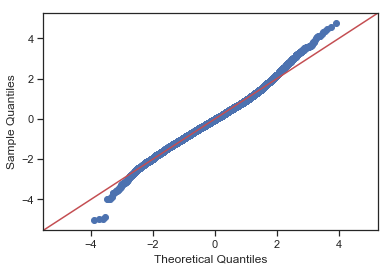

In [354]:
residuals = model.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)

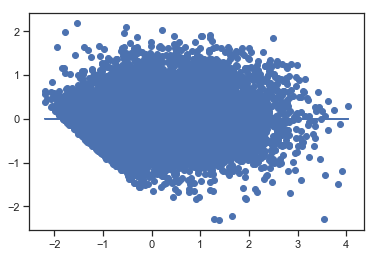

In [355]:
x_cols = subset.columns
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])

# 4) Model Validation

In [ ]:
#inspect which 5 variables explain .3 of prices!
#perhaps drop a columns for each category?
#https://www.datacamp.com/community/tutorials/feature-selection-python

In [ ]:
# When using a train test split, we'll compare your residuals for both test set and training set
# A big difference in value between the test and training set (R)MSE is an indication of overfitting

## train-test-split with Scikit-learn

In [356]:
y = subset[["price"]]
X = subset.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

16912 4228 16912 4228


In [357]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#linreg.predict will plot create a new variable y_hat with contains the predicted house prices based on our 
#training and testing models

In [358]:
# this equation takes in the the differences between the predicted and the original value**2,
# divides them by the number of observations and sums them up = MSE
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('TRAIN Mean Squarred Error:', mse_train)
print('TEST Mean Squarred Error:', mse_test)

TRAIN Mean Squarred Error: price    0.207505
dtype: float64
TEST Mean Squarred Error: price    0.210767
dtype: float64


In [359]:
print('Difference between train and test MSE:', mse_test-mse_train)

Difference between train and test MSE: price    0.003262
dtype: float64


## cross-validation

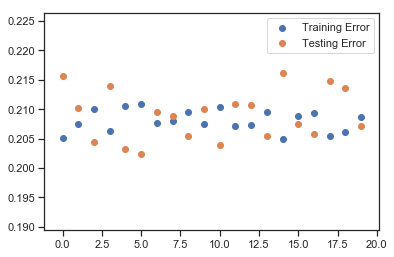

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## K-fold cross validation

In [361]:
# I will not perform the K-fold cross validation, which takes in combinations of testing and training data
# across entire dataset. This way we test all data against its remaining data.
# Cross-validation MSE = average of individual results

from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))


In [362]:
k_fold_result = abs(cv_5_results)

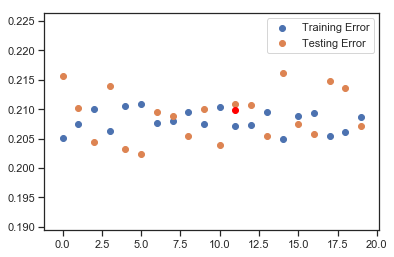

In [363]:
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.scatter(11,k_fold_result,color='red')
plt.legend();                                   
